**<font size="+1">Nhận dạng hình ảnh chữ viết tay bằng mô hình Gaussian Naive Bayes</font>**

1. Khai báo các thư viện cần thiết

In [1]:
import os
import numpy as np
import gzip 
import time

2. Khai báo đường dẫn đến tệp dữ liệu

In [2]:
data_path = '../../data/'

train_images_path = os.path.join(data_path, 'train-images-idx3-ubyte.gz')
train_labels_path = os.path.join(data_path, 'train-labels-idx1-ubyte.gz')

test_images_path = os.path.join(data_path, 't10k-images-idx3-ubyte.gz')
test_labels_path = os.path.join(data_path, 't10k-labels-idx1-ubyte.gz')

3. Định nghĩa hàm `get_mnist_data` để tải dữ liệu từ tệp gzip chứa hình ảnh và nhãn của bộ dữ liệu

In [3]:
def get_mnist_data(images_path, labels_path, num_images, shuffle=False, _is=True, image_size=28):
    f_images = gzip.open(images_path,'r')
    f_images.read(16)
   
    real_num = num_images if not shuffle else (60000 if _is else 10000)
    buf_images = f_images.read(image_size * image_size * real_num)

    images = np.frombuffer(buf_images, dtype=np.uint8).astype(np.float32)
    images = images.reshape(real_num, image_size, image_size,)

    f_labels = gzip.open(labels_path,'r')
    f_labels.read(8)
    labels = np.zeros((real_num)).astype(np.int64)

    for i in range(0, real_num):
        buf_labels = f_labels.read(1)
        labels[i] = np.frombuffer(buf_labels, dtype=np.uint8).astype(np.int64)

    if shuffle is True:
        rand_id = np.random.randint(real_num, size=num_images)
        images = images[rand_id, :]
        labels = labels[rand_id,]

    images = images.reshape(num_images, image_size * image_size)
    return images, labels

4. Sử dụng hàm `get_mnist_data` lấy dữ liệu train, test từ tệp dữ liệu

In [4]:
train_images, train_labels = get_mnist_data(
    train_images_path, train_labels_path, 60000)
test_images, test_labels = get_mnist_data(
    test_images_path, test_labels_path, 10000, _is=False)
print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

C:\Users\dangngocquan\AppData\Local\Temp\ipykernel_1580\2761624895.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  labels[i] = np.frombuffer(buf_labels, dtype=np.uint8).astype(np.int64)


(60000, 784) (60000,)
(10000, 784) (10000,)


5. Chuẩn hóa dữ liệu

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_x = scaler.fit_transform(train_images)
test_x = scaler.fit_transform(test_images)

print(train_x.shape)
print(test_x.shape)

(60000, 784)
(10000, 784)


6. Sử dụng phương pháp PCA giảm số chiều dữ liệu về 100 chiều

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=100)
pca.fit(train_images)
X_train = pca.transform(train_images)
X_test = pca.transform(test_images)

print(X_train.shape)
print(X_test.shape)

(60000, 100)
(10000, 100)


7. Huấn luyện mô hình Gaussian Naive Bayes và dự đoán nhãn cho tập dữ liệu test

In [7]:
from sklearn.naive_bayes import GaussianNB

start_time = time.time()

model = GaussianNB()
model.fit(X_train, train_labels)

end_time = time.time()

pred_labels = model.predict(X_test)
print(pred_labels)

[7 2 1 ... 9 5 6]


8. Trực quan một số dự đoán nhãn cho tập dữ liệu test của mô hình

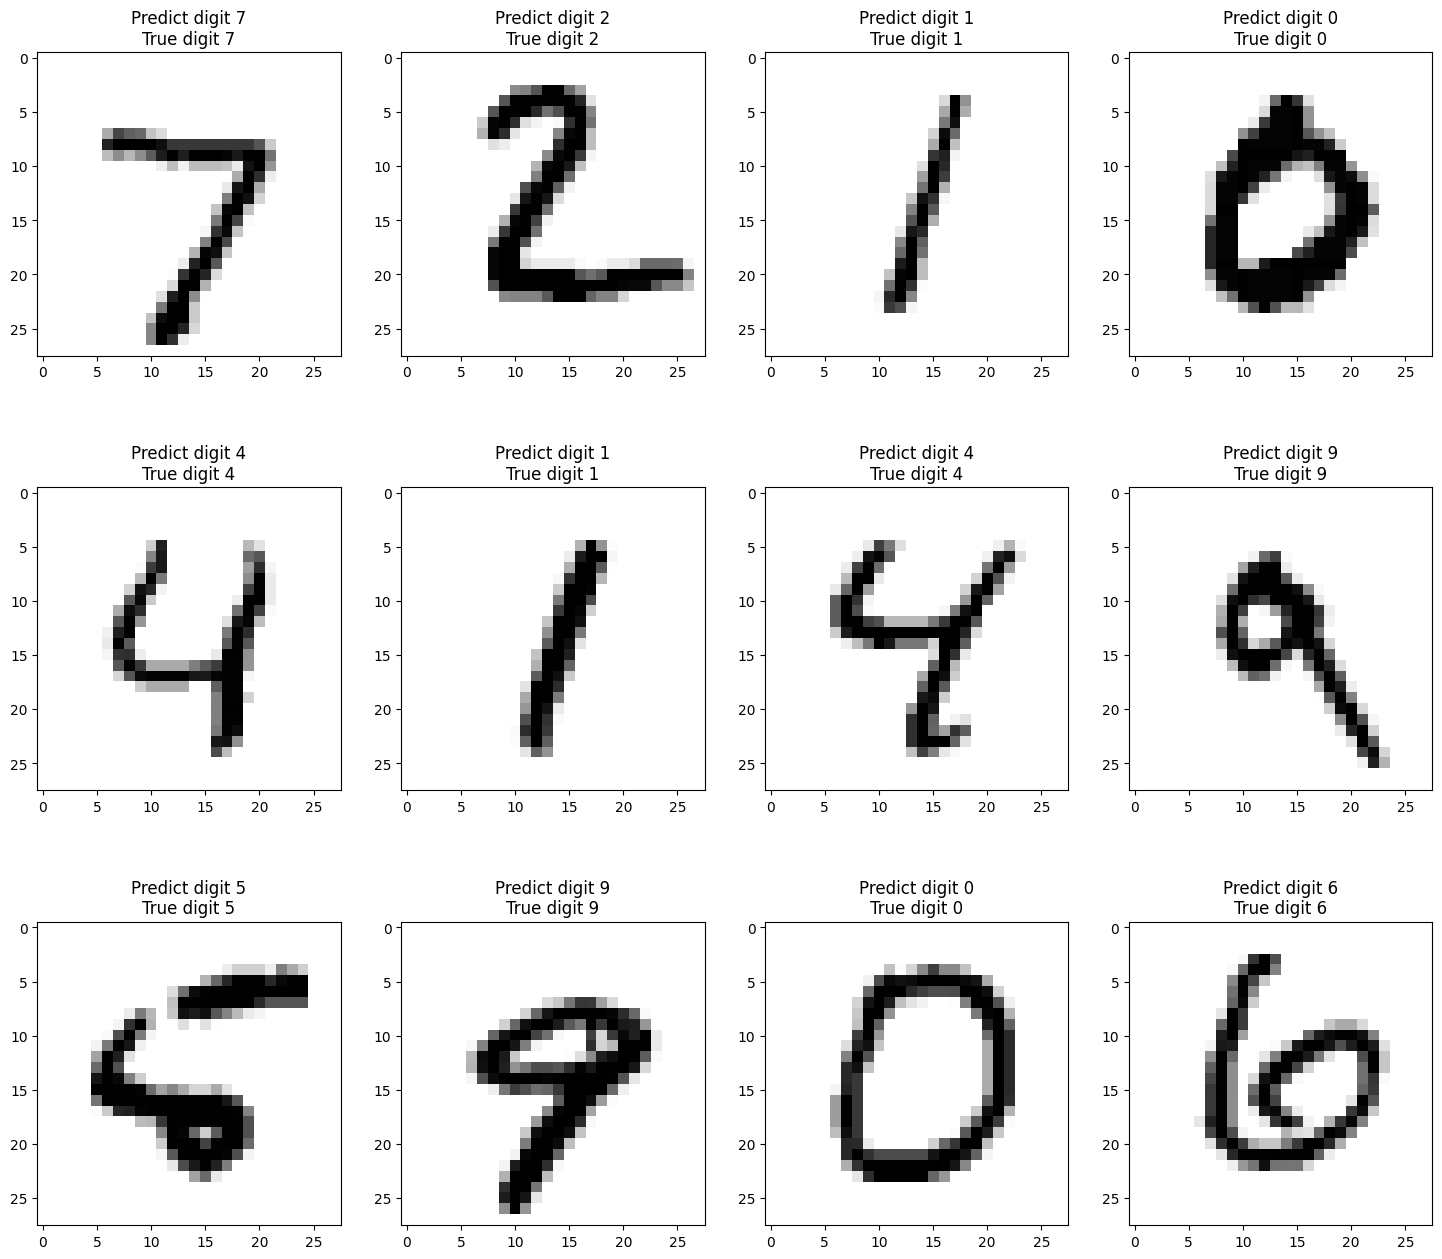

In [8]:
import matplotlib.pyplot as plt

fig, axis = plt.subplots(3, 4, figsize=(18, 16))

for i, ax in enumerate(axis.flat):
    ax.imshow(test_images[i].reshape(28, 28), cmap='binary')
    ax.set(title = "Predict digit {0}\nTrue digit {1}".format(pred_labels[i], test_labels[i]))

9. Tính các chỉ số `accuracy`, `confusion matrix`, `precision`, `recall` của mô hình

In [9]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

train_time = end_time - start_time
print("Train time: ", train_time)

accuracy = accuracy_score(test_labels, pred_labels)
print("Accuracy:", accuracy)

confusion_matrix = confusion_matrix(test_labels, pred_labels)
print("Confusion Matrix:")
print(confusion_matrix)

precision = precision_score(test_labels, pred_labels, average='macro')
print("Precision:", precision)

recall = recall_score(test_labels, pred_labels, average='macro')
print("Recall:", recall)

Train time:  0.06885886192321777
Accuracy: 0.8757
Confusion Matrix:
[[ 912    0   35    2    0   19    9    1    1    1]
 [   0 1069    9    7    4   12    9    3   20    2]
 [  12    0  874   57   10   11   12    9   46    1]
 [   4    0   37  872    2   27    4   21   28   15]
 [   1    0   30    2  847    8   11    4    6   73]
 [   6    1    8   61    4  758   11    4   31    8]
 [   6    2   36    1    8   33  871    0    1    0]
 [   4   18   40    6   20   16    4  861   11   48]
 [  11    0   25   30    9   32    5    6  846   10]
 [  10    1   31   10   48   20    1   30   11  847]]
Precision: 0.8766855547856609
Recall: 0.8749791868756359


**Đánh giá tổng quan mô hình:<br>**
+ `Train time`: 0.0565 giây
+ `Accuracy` của mô hình khoảng 87.92%, tức là khoảng 87.92% các dự đoán được thực hiện đúng trên tập dữ liệu kiểm tra. Đây là một kết quả khá tốt<br>
+ `Confusion Matrix` cung cấp thông tin chi tiết về các dự đoán của mỗi lớp. Số liệu trên đường chéo chính của ma trận khá cao và sấp sỉ nhau. Từ đây, ta thấy rằng mô hình dự đoán phân loại các lớp khá tốt, với số lượng nhầm lẫn ít.<br>
+ `Precision` trung bình của mô hình khoảng 88.01%, tức là trung bình tỷ lệ giữa số lượng dự đoán đúng của một lớp trên tổng số lần dự đoán cho lớp đó là 88.01%. Điều này cho thấy việc dự đoán của mô hình có độ chính xác khá tốt<br>
+ `Recall` trung bình của mô hình khoảng 87.86%, tức là trung bình tỷ lệ giữa số lượng dự đoán đúng của một lớp trên tổng số lần lớp đó thực sự xuất hiện trong dữ liệu là 87.86%. Điều này cho thấy mô hình có khả năng nhận diện đúng các mẫu thực sự thuộc vào mỗi lớp khá tốt.<br>

Nhìn chung, chương trình có thời gian huấn luyện nhanh chóng, đạt được hiệu suất khá tốt trong việc phân loại hình ảnh chữ viết tay bằng việc sử dụng mô hình Gaussian Naive Bayes kết hợp với kỹ thuật giảm chiều dữ liệu PCA.<br>